In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/ES_Twitch_Dataset/Train_Final.csv")
test = pd.read_csv("/content/drive/MyDrive/ES_Twitch_Dataset/Test_Final.csv")

In [ ]:
x_train = train.drop({'Target', 'Unnamed: 0'}, axis = 1)
y_train = train['Target']

In [ ]:
x_test = test.drop({'Target', 'Unnamed: 0'}, axis = 1)
y_test = test['Target']

In [ ]:
rfc = RandomForestClassifier(random_state = 40, n_estimators=15)

params = {"max_depth": [None, 2, 4, 5, 7, 10, 15],
          "max_features": [1, 3, 5, 10, 15, 20, 30],
          "n_estimators" : [50, 100, 150, 200],
          "min_samples_split": [1, 3, 5, 10, 15, 20],
          "min_samples_leaf": [1, 3, 5, 10, 15, 20]
          }

model = RandomizedSearchCV(rfc, params, random_state = 40, n_jobs = 1, n_iter = 20, cv = 5, scoring="roc_auc")

### Entreno el modelo

In [ ]:
model.fit(x_train, y_train)

Los mejores hiperparametros que se encontraron:

In [ ]:
best_params = model.best_estimator_.get_params()
best_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 30,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 40,
 'verbose': 0,
 'warm_start': False}

El Randomized Search ya me devuelve el mejor modelo posible, así que no es necesario volver a entrenar.

## Scores

Calculo el score para el set de entrenamiento

In [ ]:
roc_auc_score(y_train, model.predict_proba(x_train)[:,1])

0.9645526701603009

Calculo el score para el set de test:

In [ ]:
roc_auc_score(y_test, model.predict_proba(x_test)[:,1])

0.890278859614465

## Matriz de confusión

Text(0.5, 1.0, 'Confusion matrix')

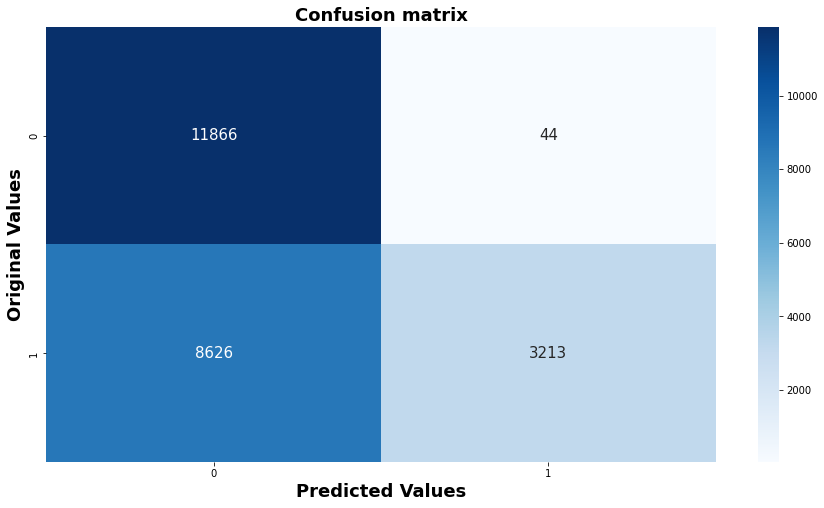

In [ ]:
C = confusion_matrix(y_test, model.predict(x_test))  
plt.figure(figsize=(15,8))
labels = [0,1]
sns.heatmap(C, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels, annot_kws={'size': 15})
plt.xlabel('Predicted Values', fontsize=18, fontweight='bold')
plt.ylabel('Original Values', fontsize=18, fontweight='bold')
plt.title("Confusion matrix", fontsize = 18, fontweight='bold')

## Features mas importantes

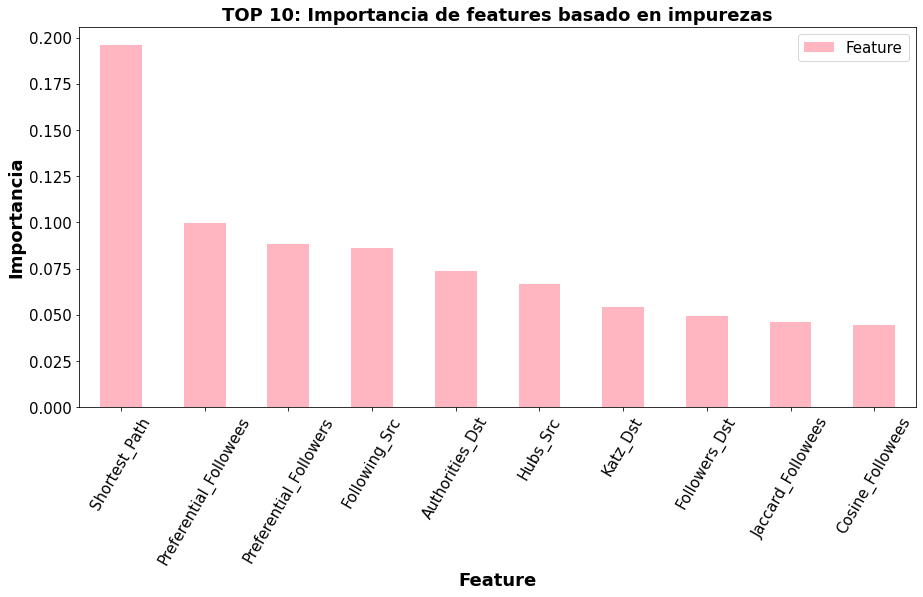

In [ ]:
rf = RandomForestClassifier(**best_params)
rf.fit(x_train, y_train)
importances = rf.feature_importances_
columns_names = list(x_train.columns.values)
dic = {}

for i in range(len(importances)):
  dic[columns_names[i]] = importances[i]

df = pd.DataFrame([[key, dic[key]] for key in dic.keys()], columns=['Feature', 'Importancia'])
df = df.sort_values('Importancia',ascending=False)
df.set_index('Feature',inplace = True)

df.iloc[0:10].plot.bar(logy=True, figsize=(15, 7), rot=60, color='lightpink', fontsize=15)
plt.title('TOP 10: Importancia de features basado en impurezas', fontsize = 18, fontweight='bold')
plt.xlabel('Feature', fontsize=18, fontweight='bold')
plt.ylabel('Importancia', fontsize=18, fontweight='bold')
plt.yscale(value='linear')
plt.legend(('Feature',), loc='upper right', prop={'size':15})

plt.show()